In [1]:
from matplotlib.pyplot import imshow
import os 
import tensorflow as tf
import numpy as np
import PIL as pil
from PIL import Image
import pandas as pd
%matplotlib inline

In [19]:
data_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/sample/'

In [30]:
filenames = os.listdir(data_dir)
filenames

['10_left.jpeg',
 '17_right.jpeg',
 '15_right.jpeg',
 '16_right.jpeg',
 '16_left.jpeg',
 '15_left.jpeg',
 '13_right.jpeg',
 '17_left.jpeg',
 '10_right.jpeg',
 '13_left.jpeg']

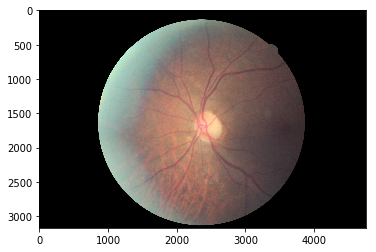

In [27]:
im = Image.open(data_dir + filenames[0])
imshow(np.asarray(im))

In [29]:
im_array = np.asarray(im)
print(im_array.shape)

(3168, 4752, 3)


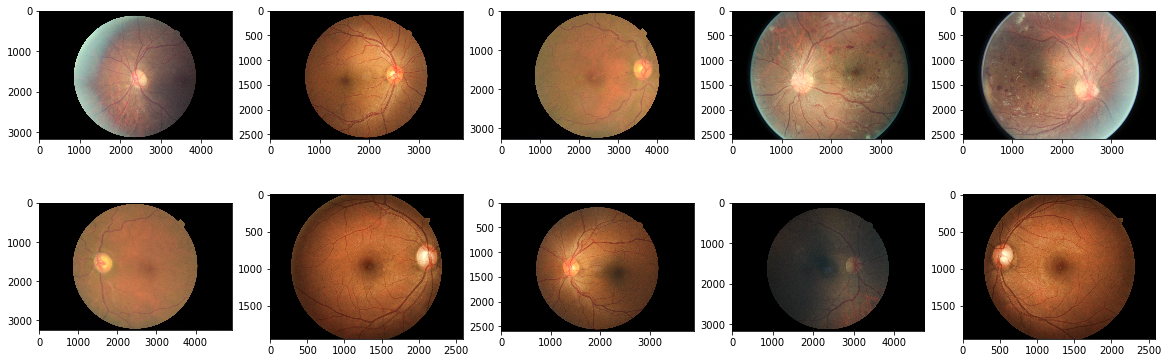

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline

images = []
for img_path in filenames:
    im = Image.open(data_dir + img_path)
    images.append(np.asarray(im))
    
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [185]:
def data_list(data_dir, label_dir):
    '''
    imports: pandas, os, numpy, PIL
    '''
    #get labels csv into pandas df
    #below line assumes 
    label_file_name = os.listdir(label_dir)[0]
    label_pd = pd.read_csv(label_dir + label_file_name)
    #initilize container list
    data = [[],[],[]]
    #get filenames om images
    filenames = os.listdir(data_dir)
    #below loop retrieved the 
    for im_name in filenames:
        im = np.asarray(Image.open(data_dir + im_name))
        name = im_name.replace(".jpeg", "")
        label = label_pd.loc[label_pd['image'] == name].iloc[0]['level']
        data[0].append(name)
        data[1].append(im)
        data[2].append(label)
        
    return(data)

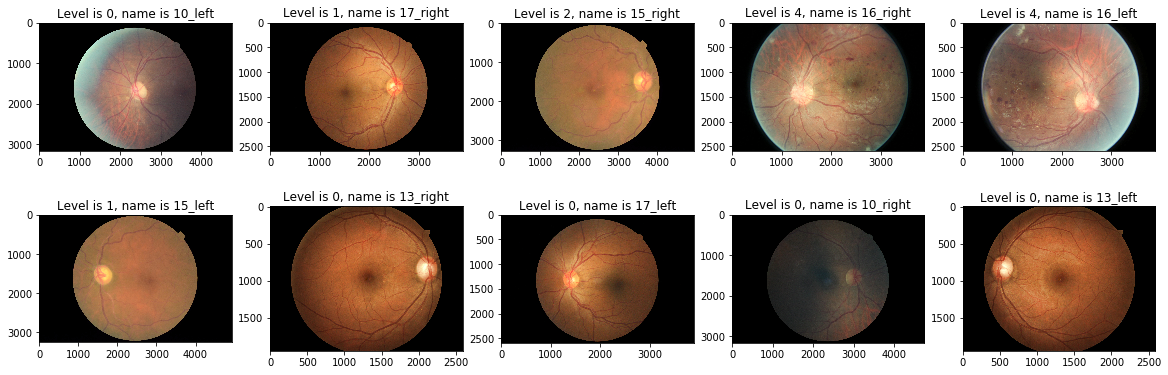

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
label_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/labels/'
data_dir = '/home/olle/PycharmProjects/Diabetic_Retinopathy_Detection/data/sample/'
data = data_list(data_dir, label_dir)
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(data[1]):
    ax = plt.subplot(len(data[1]) / columns + 1, columns, i + 1)
    ax.set_title("Level is {}, name is {}".format(data[2][i], data[0][i]))
    ax.imshow(image)

In [194]:
data[1][1].shape

(2592, 3888, 3)